## 1. Data Ingestion

In this step, I load the COVID testing data from the public Johns Hopkins API
directly into a pandas DataFrame using `pd.read_json()`.


In [1]:
# Importing the libraries I need for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
# Public API endpoint for the Johns Hopkins COVID-19 testing data
JHU_TESTING_API_URL = "https://jhucoronavirus.azureedge.net/api/v1/testing/daily.json"

In [3]:
# Load the JSON data from the public JHU API into a pandas DataFrame.
# pd.read_json() takes the URL, makes the HTTP request, and parses the JSON.
raw_df = pd.read_json(JHU_TESTING_API_URL)
raw_df

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,20200306,AK,NaN,NaN,NaN,NaN,8.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
1,20200307,AK,NaN,NaN,NaN,NaN,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN
2,20200308,AK,NaN,NaN,NaN,NaN,14.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN
3,20200309,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
4,20200310,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36623,20211215,VT,54862.0,NaN,NaN,NaN,2711652.0,559850.0,2711652.0,56661.0,NaN,NaN,54862.0,1799.0
36624,20211215,WA,699633.0,734205.0,10118939.0,9958651.0,NaN,NaN,9958651.0,796369.0,NaN,NaN,699633.0,96736.0
36625,20211215,WI,928112.0,NaN,NaN,12813229.0,NaN,4657288.0,12813229.0,1043693.0,NaN,NaN,928112.0,115581.0
36626,20211215,WV,241479.0,NaN,NaN,NaN,4696447.0,NaN,4765213.0,310245.0,NaN,NaN,241479.0,68766.0


## 2. Initial Exploration

In this step, I do some basic checks on the raw dataset such as:
- Number of rows and columns
- Column names and data types
- High-level look at missing values


In [4]:
# Checking how many rows and columns are in the full dataset

rows,cols = raw_df.shape
print(f"The full dataset has {rows} rows and {cols} columns.")

The full dataset has 36628 rows and 14 columns.


### 2.1 Column names

Here I list all the columns in the raw dataset so I know which fields are available
for testing metrics, case metrics, and filtering by state/date.


In [5]:
# Looking at all the column names present in the dataset
raw_df.columns

Index(['date', 'state', 'people_viral_positive', 'tests_viral_positive',
       'tests_viral_negative', 'encounters_viral_total', 'tests_viral_total',
       'people_viral_total', 'tests_combined_total', 'cases_conf_probable',
       'people_antigen_positive', 'people_antigen_total', 'cases_confirmed',
       'cases_probable'],
      dtype='object')

In [6]:
# Saving the column names so I can loop over them later if needed
column_names = list(raw_df.columns)

### 2.2 Missing values

Here I check how many missing values there are in each column. This helps me identify which fields are complete and which ones are sparsely populated or unused.


In [7]:
# Checking how many missing values there are in each column
raw_df.isnull().sum()

date                           0
state                          0
people_viral_positive       3452
tests_viral_positive       19592
tests_viral_negative       26463
encounters_viral_total     27440
tests_viral_total           8782
people_viral_total         20430
tests_combined_total         211
cases_conf_probable          307
people_antigen_positive    35146
people_antigen_total       34463
cases_confirmed            22683
cases_probable             22684
dtype: int64

#### Observation
The date and state columns are fully complete (no missing values), while key cumulative metrics like tests_combined_total and cases_conf_probable have relatively few nulls and are safe to use for core analysis. In contrast, more detailed fields such as antigen-related metrics and the confirmed/probable case split have many missing values, so they’re only suitable for limited analysis.

In [8]:
#To get a quick summary of the dataset structure I used raw_df.info()
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36628 entries, 0 to 36627
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     36628 non-null  int64  
 1   state                    36628 non-null  object 
 2   people_viral_positive    33176 non-null  float64
 3   tests_viral_positive     17036 non-null  float64
 4   tests_viral_negative     10165 non-null  float64
 5   encounters_viral_total   9188 non-null   float64
 6   tests_viral_total        27846 non-null  float64
 7   people_viral_total       16198 non-null  float64
 8   tests_combined_total     36417 non-null  float64
 9   cases_conf_probable      36321 non-null  float64
 10  people_antigen_positive  1482 non-null   float64
 11  people_antigen_total     2165 non-null   float64
 12  cases_confirmed          13945 non-null  float64
 13  cases_probable           13944 non-null  float64
dtypes: float64(12), int64(

From this df.info() output, I noticed that the date column is stored as int64 and all the testing/case metrics are in float64. In reality, date should be a proper datetime field and these metrics represent counts, so they should be numeric integer-like values.

In [9]:
# Summary for Entire Dataset
print("="*50)
print("DATA OVERVIEW")
print("="*50)
print(f"Total observations: {raw_df.shape[0]}")
print(f"Number of features: {raw_df.shape[1]}")
print(f"Memory usage: {raw_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"States covered: {raw_df['state'].nunique()}")

DATA OVERVIEW
Total observations: 36628
Number of features: 14
Memory usage: 5.69 MB
States covered: 56


## 3. Data Cleaning
### 3.1 Standardizing Data Types

In [10]:
# Making a working copy of the raw data so I don't modify raw_df directly
testing_df = raw_df.copy()

# Converting all metric columns (except date and state) to nullable integer
for col in column_names:
    if col in ("date", "state"):
        continue
    testing_df[col] = pd.to_numeric(testing_df[col], errors="coerce").astype("Int64")

# Converting date from YYYYMMDD integer format to a proper datetime type
testing_df["date"] = pd.to_datetime(testing_df["date"].astype(str), format="%Y%m%d")
#Droping the duplicates if present
testing_df = testing_df.drop_duplicates(subset=["state", "date"])


## 4. Filter Data for New York State


In [11]:
# New York-only subset
ny_df=testing_df[testing_df['state']=='NY'].copy()

In [12]:
# Checking how many rows and columns are in the subset
rows,cols = ny_df.shape
print(f"The Newyork dataframe has {rows} rows and {cols} columns.")

The Newyork dataframe has 654 rows and 14 columns.


In [13]:
# Sort and reset index for time-series work
ny_df = ny_df.sort_values("date").reset_index(drop=True)

In [14]:
#checking for null values
ny_df.isnull().sum()

date                         0
state                        0
people_viral_positive        0
tests_viral_positive       654
tests_viral_negative       654
encounters_viral_total       0
tests_viral_total          654
people_viral_total         654
tests_combined_total         0
cases_conf_probable          0
people_antigen_positive    654
people_antigen_total       654
cases_confirmed            403
cases_probable             403
dtype: int64

For the New York subset, date, state, people_viral_positive, encounters_viral_total, tests_combined_total, and cases_conf_probable have no missing values, so these are the main reliable columns for analysis. Several fields like tests_viral_positive, tests_viral_negative, tests_viral_total, people_viral_total, and the antigen columns are completely null (654 missing), so they don’t add any value for NY. The detailed case breakdown (cases_confirmed and cases_probable) is partially available (403 nulls), so I can use it only for a limited subset of dates where those values are present.

In [15]:
#Drop columns that are completely null for New York
ny_df=ny_df.dropna(axis=1,how='all')

In [16]:
# Data completeness, duplicate removal
completion_pct = (ny_df.notna().sum() / len(ny_df) * 100).round(1)
print("Column completeness (% non-null):")
print(completion_pct.sort_values(ascending=False))

# Identify sparse confirmed/probable case columns (keep only if reasonably complete)
case_cols = [c for c in ["cases_confirmed", "cases_probable"] if c in ny_df.columns]
sparse_threshold = 60  # percent completeness required to retain
sparse_drop = [c for c in case_cols if completion_pct.get(c, 0) < sparse_threshold]
if sparse_drop:
    print("Dropping sparse case columns:", sparse_drop)
    ny_df = ny_df.drop(columns=sparse_drop)
else:
    print("No sparse case columns dropped.")

Column completeness (% non-null):
date                      100.0
state                     100.0
people_viral_positive     100.0
encounters_viral_total    100.0
tests_combined_total      100.0
cases_conf_probable       100.0
cases_confirmed            38.4
cases_probable             38.4
dtype: float64
Dropping sparse case columns: ['cases_confirmed', 'cases_probable']


**Note**: For the New York subset, I first checked column completeness by computing the percentage of non-null values for each field. The cases_confirmed and cases_probable columns are only populated for part of the timeline, because earlier in the pandemic this breakdown was managed by a different COVID-tracking effort and JHU’s schema evolved over time. To avoid mixing a partially reported metric with fully reported ones, I applied a simple rule: if a case column is less than 60% complete for New York, I drop it from the core analysis. In this dataset, that means cases_confirmed / cases_probable are treated as secondary and removed from the main NY frame, while I continue to rely on the more stable cumulative cases_conf_probable series. This keeps the dataset cleaner.

In [17]:
# Drop duplicate encounters_viral_total if it matches tests_combined_total exactly
if "encounters_viral_total" in ny_df.columns and "tests_combined_total" in ny_df.columns:
    if (ny_df["encounters_viral_total"].equals(ny_df["tests_combined_total"])):
        ny_df = ny_df.drop(columns=["encounters_viral_total"])
        print("Dropped perfectly duplicate column: encounters_viral_total")
    else:
        print("encounters_viral_total retained (not an exact duplicate).")

Dropped perfectly duplicate column: encounters_viral_total


**Note:** In the JHU schema, encounters_viral_total and tests_combined_total can mean different things, but for New York in this dataset they are exactly identical across all 654 records (same value for every date). Since they don’t add any extra information here, I dropped encounters_viral_total and kept tests_combined_total as the single cumulative testing metric for the NY analysis.

I kept both people_viral_pos_cum and cases_conf_probable_cum, treating their equality here as a useful consistency check, but preserving them in case they diverge in other geographies, refreshes, or analyses where the distinction between “positive people” and “reported cases” actually matters.

In [18]:
# Renaming key cumulative columns for clarity (_cum suffix)
rename_map = {}
if "tests_combined_total" in ny_df.columns:
    rename_map["tests_combined_total"] = "tests_cum"
if "people_viral_positive" in ny_df.columns:
    rename_map["people_viral_positive"] = "people_viral_pos_cum"
if "cases_conf_probable" in ny_df.columns:
    rename_map["cases_conf_probable"] = "cases_conf_probable_cum"
ny_df = ny_df.rename(columns=rename_map)
print("Renamed columns:", rename_map)


Renamed columns: {'tests_combined_total': 'tests_cum', 'people_viral_positive': 'people_viral_pos_cum', 'cases_conf_probable': 'cases_conf_probable_cum'}


Here I renamed the main cumulative fields to make their meaning clearer: tests_combined_total becomes tests_cum, people_viral_positive becomes people_viral_pos_cum, and cases_conf_probable becomes cases_conf_probable_cum. The _cum suffix reminds me that these are cumulative series (not daily values), which helps keep the later daily features (tests_daily) conceptually separate.

In [19]:
# Derive daily testing metric from cumulative tests
if "tests_cum" in ny_df.columns:
    ny_df["tests_daily"] = ny_df["tests_cum"].diff().fillna(0)
    ny_df["tests_daily_7dma"] = ny_df["tests_daily"].rolling(7).mean().round(2)
    print("Derived tests_daily and tests_daily_7dma.")
else:
    print("tests_cum not found; daily series not created.")


Derived tests_daily and tests_daily_7dma.


In [20]:
ny_df

,date,state,people_viral_pos_cum,tests_cum,cases_conf_probable_cum,tests_daily,tests_daily_7dma
0,2020-03-02,NY,0,0,0,0,NaN
1,2020-03-03,NY,1,1,1,1,NaN
2,2020-03-04,NY,1,10,1,9,NaN
3,2020-03-05,NY,3,30,3,20,NaN
4,2020-03-06,NY,25,122,25,92,NaN
...,...,...,...,...,...,...,...
649,2021-12-11,NY,2814725,83079987,2814725,273607,218341.00
650,2021-12-12,NY,2826302,83329780,2826302,249793,220523.43
651,2021-12-13,NY,2835295,83509484,2835295,179704,228718.86
652,2021-12-14,NY,2843561,83652449,2843561,142965,227830.43


In [21]:
### Summary of numeric columns for New York
ny_df.describe(include='number')

,people_viral_pos_cum,tests_cum,cases_conf_probable_cum,tests_daily,tests_daily_7dma
count,654.0,654.0,654.0,654.0,648.000000
mean,1292876.577982,33822544.056575,1292876.577982,128264.461774,128483.398287
std,890916.602995,27272710.043893,890916.602995,76087.274505,67143.770592
min,0.0,0.0,0.0,0.0,55.430000
25%,422887.25,6750456.0,422887.25,67555.0,68655.500000
50%,1307374.0,30162004.0,1307374.0,119382.5,135267.000000
75%,2099584.0,59168811.75,2099584.0,193525.75,186693.287500
max,2856505.0,83884958.0,2856505.0,424199.0,239637.430000


The cumulative metrics people_viral_pos_cum, tests_cum, and cases_conf_probable_cum all go from 0 up to about 2.86M people and 83.88M tests.

The average daily tests (tests_daily) is around 128k tests per day, with a median of ~119k and a wide spread (up to ~424k on the busiest days), showing strong variation in daily testing volume.

The 7-day moving average (tests_daily_7dma) is slightly smoother (lower std), with typical values between ~68k and ~187k, which confirms that the rolling mean is doing its job of reducing day-to-day noise while keeping the overall testing trend.

In [22]:
# Save cleaned New York data to CSV
ny_df.to_csv("ny_covid_testing.csv", index=False)


In [23]:
# Average of the cumulative tests (tests_cum) over all days
avg_cumulative_tests_ny = ny_df['tests_cum'].dropna().mean()
print(f"Average of cumulative tests_cum for NY: {avg_cumulative_tests_ny:,.0f}")

Average of cumulative tests_cum for NY: 33,822,544


As requested, I computed the mean of tests_combined_total for New York, which is about 33,822,544. Since this field is cumulative, this mean is not very meaningful as an ‘average per day’, so I mainly treat it as a required output rather than a core metric.

###### Why tests_daily?
tests_cum is a cumulative field (total tests up to each date), so taking its mean does not give a meaningful “average tests per day.” To get an actual daily testing number, I first created a tests_daily column using the day-to-day difference:

In [24]:
# Average number of tests performed per day in New York, based on the derived tests_daily series
avg_daily_tests_ny = ny_df['tests_daily'].mean()
print(f"Average daily tests in NY (from tests_daily): {avg_daily_tests_ny:,.0f}")

Average daily tests in NY (from tests_daily): 128,264


In [25]:
# Find the index of the max daily tests
peak_idx = ny_df['tests_daily'].idxmax()

# Get the date and value for that peak day
peak_date = ny_df.loc[peak_idx, 'date']
peak_daily_tests = ny_df.loc[peak_idx, 'tests_daily']

print(f"Peak daily tests in NY: {peak_daily_tests:,.0f} on {peak_date.date()}")


Peak daily tests in NY: 424,199 on 2021-05-02


In [26]:
print("\n" + "="*50)
print("NEW YORK STATE DATA SUMMARY")
print("="*50)
print(f"Observations: {ny_df.shape[0]}")
print(f"Date range: {ny_df['date'].min()} to {ny_df['date'].max()}")
if "tests_cum" in ny_df.columns:
    print(f"Total tests (final count): {ny_df['tests_cum'].max():,.0f}")
    print(f"Average cumulative total: {avg_cumulative_tests_ny:,.0f}")
if "tests_daily" in ny_df.columns:
    print(f"Average daily tests: {ny_df['tests_daily'].mean():,.0f}")
if "tests_daily_7dma" in ny_df.columns:
    print(f"Current 7-day avg daily tests: {ny_df['tests_daily_7dma'].iloc[-1]:,.0f}")


NEW YORK STATE DATA SUMMARY
Observations: 654
Date range: 2020-03-02 00:00:00 to 2021-12-15 00:00:00
Total tests (final count): 83,884,958
Average cumulative total: 33,822,544
Average daily tests: 128,264
Current 7-day avg daily tests: 228,130


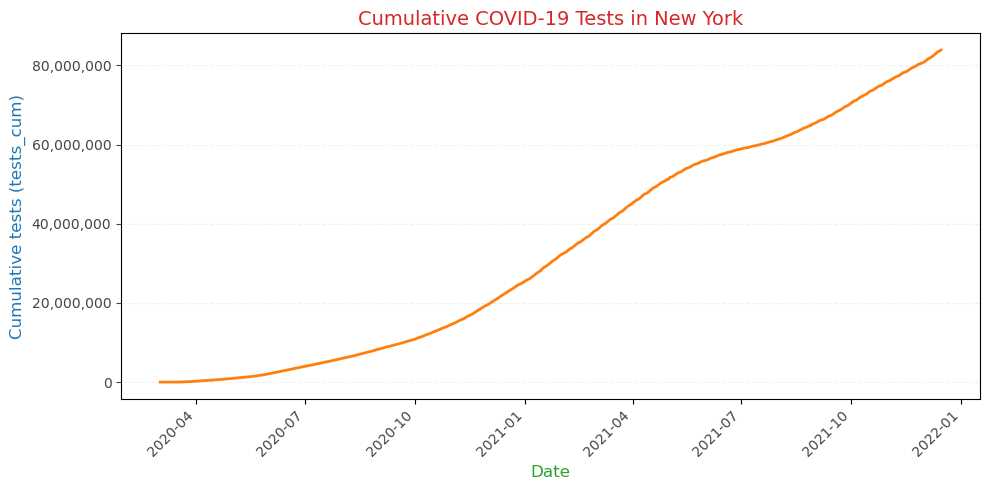

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(ny_df["date"], ny_df["tests_cum"], linewidth=2, color="#ff7f0e")

# Title and axis labels with vibrant colors
ax.set_title("Cumulative COVID-19 Tests in New York", fontsize=14, color="#d62728")
ax.set_xlabel("Date", fontsize=12, color="#2ca02c")
ax.set_ylabel("Cumulative tests (tests_cum)", fontsize=12, color="#1f77b4")

# Formatting y-axis with commas
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Tick label colors + rotation
plt.xticks(rotation=45, ha="right", color="#444444")
ax.tick_params(axis="y", colors="#444444")

# Light grid on y-axis
ax.grid(True, axis="y", linestyle="--", alpha=0.4, color="#dddddd")

# Save as PNG before showing
fig.savefig("ny_cumulative_tests.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

From the cumulative testing curve for New York, I can see three clear phases:

Early phase (Mar 2020 – Jun 2020): The curve starts near zero and rises slowly. Testing capacity is still ramping up, so cumulative tests grow but at a gentle slope.

Rapid expansion phase (Jul 2020 – Apr 2021): The line becomes much steeper, showing a big jump in daily testing volume. This is the main period where New York scales testing aggressively and cumulative tests climb from a few million to ~50–60 million.

Stabilization phase (May 2021 – end of 2021): The curve continues to rise but with a slightly flatter slope. Testing is still high, but growth is more stable, and cumulative tests reach around 84 million by the end of the period.

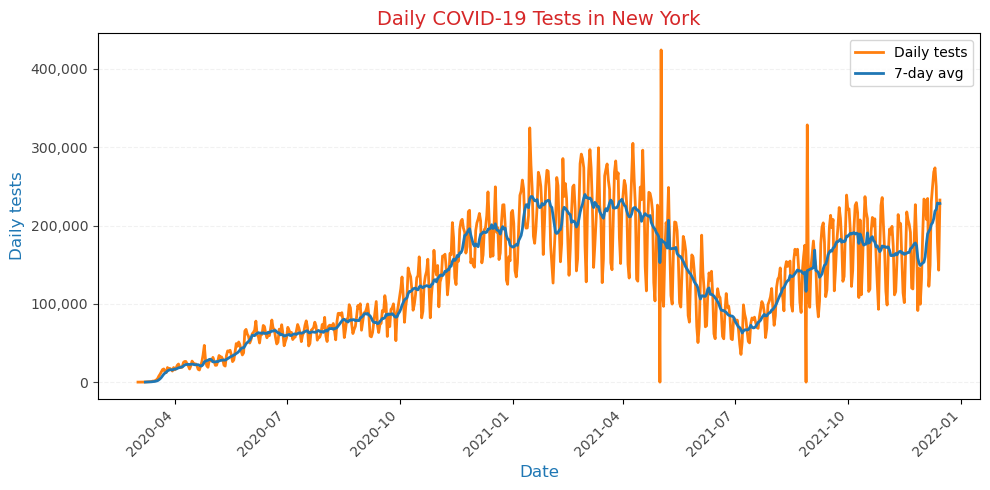

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(ny_df["date"], ny_df["tests_daily"], linewidth=2, color="#ff7f0e", label="Daily tests")
if "tests_daily_7dma" in ny_df.columns:
    ax.plot(ny_df["date"], ny_df["tests_daily_7dma"], linewidth=2, color="#1f77b4", label="7-day avg")

# Title and axis labels with vibrant colors
ax.set_title("Daily COVID-19 Tests in New York", fontsize=14, color="#d62728")
ax.set_xlabel("Date", fontsize=12, color="#1f77b4")
ax.set_ylabel("Daily tests", fontsize=12, color="#1f77b4")

# Formatting y-axis with commas
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Tick label colors + rotation
plt.xticks(rotation=45, ha="right", color="#444444")
ax.tick_params(axis="y", colors="#444444")

# Light grid on y-axis
ax.grid(True, axis="y", linestyle="--", alpha=0.4, color="#dddddd")

# Legend
ax.legend()

# Save daily tests chart as PNG
fig.savefig("ny_daily_tests.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

Looking at the daily testing chart for New York. There is a gradual increase in daily tests through mid-2020, a strong peak period from late 2020 into early 2021 where daily volumes regularly exceed 200–300k tests, followed by a dip around mid-2021 and another rise later in 2021. The very tall spikes likely correspond to backlog days where multiple days of tests were reported together or data corrections from the source.